In [1]:
import pandas as pd
import numpy as np
from IPython.core.display import display, HTML
display(HTML("<style>.container { width:90% !important; }</style>"))
#%matplotlib
%matplotlib inline
import matplotlib.style
matplotlib.style.use('seaborn-whitegrid')# ggplot, seaborn-whitegrid print(plt.style.available)
import matplotlib.pyplot as plt
plt.rcParams['figure.figsize'] = (16, 9)
from sklearn.mixture import GaussianMixture, BayesianGaussianMixture
from sklearn.covariance import EmpiricalCovariance, MinCovDet
from sklearn.preprocessing import StandardScaler

In [2]:
#a = [np.random.normal(10,5) + 50 for x in range(0,10000)]
#a = [np.random.lognormal(5,0.4) for x in range(0,10000)]
#a = [np.random.chisquare(4)*20 for x in range(0,10000)]
a = [np.random.gamma(1.5,100) for x in range(0,1000)]
b = [np.random.normal(450,50) + 100 for x in range(0,1000)]
df1 = pd.DataFrame(a)
df2 = pd.DataFrame(b)
df3 = pd.concat([df1,df2])
#df3 = df3.apply(lambda x: np.log(x+1))
#df1.plot(kind='kde', xlim=(0, 500))

#df3.plot(kind='kde')
#df3.plot(kind='hist', bins=200)
#df2.plot.kde()

In [ ]:
#df3.to_csv('hist.csv', index=False, header=False)

In [3]:
def gmm_cost(data):
    ind, gs = [], []
    for i in np.power(2, np.arange(0, int(np.log2(len(data))))):
        gmm = GaussianMixture(i)
        gmm.fit(data)
        ind.append(i)
        #gs.append([np.log1p(gmm.aic(train)), np.log1p(gmm.bic(train)), gmm.score_samples(train).std()])
        gs.append([gmm.aic(data), gmm.bic(data), 1000*gmm.score_samples(data).std()])
    return pd.DataFrame(gs, index=ind, columns=['AIC','BIC','STD'])

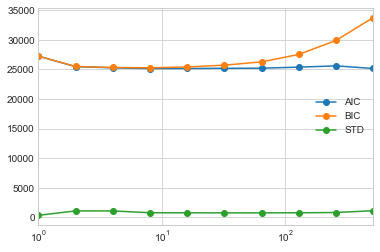

In [4]:
gmm_cost(df3).plot(marker='o', logx=True)

In [5]:
gmm = GaussianMixture(2, n_init=10)
#gmm = BayesianGaussianMixture(2)
gmm.fit(df3)
print(gmm.weights_)
print(gmm.means_)
print(gmm.covariances_)

[0.47280758 0.52719242]
[[131.84985866]
 [546.46073672]]
[[[8142.19084746]]

 [[3363.16132727]]]


In [6]:
print(np.logspace(0, 10, 11, base=2))
1000*np.linspace(1, 1, 11)
np.power(2, np.arange(0, 11))

[1.000e+00 2.000e+00 4.000e+00 8.000e+00 1.600e+01 3.200e+01 6.400e+01
 1.280e+02 2.560e+02 5.120e+02 1.024e+03]


array([   1,    2,    4,    8,   16,   32,   64,  128,  256,  512, 1024])

In [7]:
a = np.power(2, np.arange(0, 11))
for i in a:
    gmm = GaussianMixture(i)
    gmm.fit(df3)
    print(i, gmm.aic(df3), gmm.bic(df3))

1 27257.202594115097 27268.40439903418
2 25480.719854210667 25508.724366508377
4 25243.53502449042 25305.144951545382
8 25176.878908562183 25305.69966513165
16 25172.242780156063 25435.48519575454
32 25216.082314705698 25748.168048362197
64 25228.537789666323 26298.31015943886
128 25423.687465333867 27568.833107338483
256 25552.32168196362 29848.213868432398
512 25134.517355350574 33731.902630747674
1024 22918.957724432134 40119.32917768587


In [8]:
def gmm_cost(data):
    ind, gs = [], []
    for i in np.power(2, np.arange(0, 1+int(np.log2(len(data))))):
        gmm = GaussianMixture(i)
        gmm.fit(data)
        ind.append(i)
        #gs.append([np.log1p(gmm.aic(train)), np.log1p(gmm.bic(train)), gmm.score_samples(train).std()])
        gs.append([gmm.aic(data), gmm.bic(data), 1000*gmm.score_samples(data).std()])
    return pd.DataFrame(gs, index=ind, columns=['AIC','BIC','STD'])

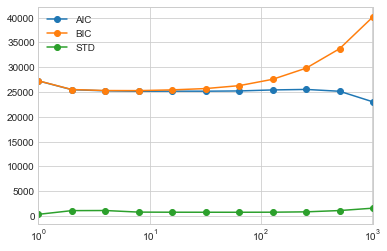

In [9]:
gmm_cost(df3).plot(marker='o', logx=True)

In [ ]:
gmm = GaussianMixture(2)
#gmm = BayesianGaussianMixture(10)
gmm.fit(df3)
sc = pd.DataFrame([(x, gmm.score(x)) for x in np.linspace(0, 800, 100)], columns=['X','Y'])
#sc = pd.DataFrame([(x, gmm.score(np.log(x+1))) for x in np.linspace(0, 800, 100)], columns=['X','Y'])
sc.plot.scatter(x='X',y='Y')
#gmm.aic(df3), gmm.bic(df3)
#sc.X.to_csv('sample.csv', index=False, header=False)
#pd.DataFrame(gmm.sample(10000)[0]).plot.kde()

In [ ]:
#gmm = MinCovDet()
gmm = EmpiricalCovariance()
gmm.fit(df3)
X = [x for x in np.linspace(10, 800, 100)]
#X = df3.values
u = np.mean(X)
#pd.DataFrame([(x, gmm.score(x)) for x in np.linspace(10, 800, 100)], columns=['X','Y']).plot.scatter(x='X',y='Y')
#pd.DataFrame([(x, gmm.mahalanobis(np.reshape([x],(1,1)))[0]) for x in np.linspace(10, 800, 100)], columns=['X','Y']).plot.scatter(x='X',y='Y')
#pd.DataFrame([(x, gmm.mahalanobis(np.reshape([x],(1,1)))[0] - u) for x in np.linspace(10, 800, 100)], columns=['X','Y']).plot.scatter(x='X',y='Y')
#pd.DataFrame(gmm.sample(10000)[0]).plot.kde()
#list(zip(X, list(gmm.mahalanobis(np.reshape(X,(len(X),1)) - u))))

#pd.DataFrame(list(zip(X.flatten(), gmm.mahalanobis(X - u))), columns=['X','Y']).plot.scatter(x='X',y='Y')
pd.DataFrame(list(zip(X, list(gmm.mahalanobis(np.reshape(X,(len(X),1)) - u)))), columns=['X','Y']).plot.scatter(x='X',y='Y')

In [ ]:
def sigmoid(x,a,b,c,d):
    s = np.ceil(a/(1 + b*np.e**(-x*c)) + d)
    return pd.DataFrame([x, s, x-s, s/x]).T #1/(1 + e**(-x))

a = 300#100
b = 10#100
c = 0.005#0.02
d = -25#4

#t1 = np.arange(15, 10000, 100)
t1 = np.arange(15, 1000, 10)
#sigmoid(t1,a,b,c,d)

def expx(x):
    s = np.ceil(np.power(x, 7/10)) - 2
    return pd.DataFrame([x, s, x-s, s/x]).T

#expx(t1)

In [ ]:
def sigmoid(x,a,b,c,d):
    s = a/(1 + b*np.e**(-x*c)) + d
    return pd.DataFrame([x, s]).T #1/(1 + e**(-x))

a = 1
b = 10000 #100
c = 0.5 #0.2
d = 0

t1 = np.linspace(0, 100, 21)
sigmoid(t1,a,b,c,d)

In [ ]:
def sm(data):
    x = data
    n = len(data)
    #return 1.06*np.std(x)*n**(-1/5)
    #return (4/3/n*np.std(x)**5)**(1/5)
    return np.std(x)*(4/3/n)**(1/5)

sm(df3)

In [ ]:
def n_parameters(data, comp):
    n_features = data.shape[1]
    cov_params = comp * n_features * (n_features + 1) / 2
    mean_params = n_features * comp
    return int(cov_params + mean_params + comp - 1)
n_parameters(df3, 2)

In [ ]:
gmm = GaussianMixture(2)
gmm.fit(df3)
gmm.bic(df3), gmm._n_parameters()

In [ ]:
from sklearn.neighbors import KernelDensity
kde = KernelDensity(50.9)
kde.fit(df3)
#bic(df3, kde)
kde.score(df3)

In [ ]:
from scipy.stats import chisquare
def bic(X, model):
    return (-2 * model.score(X) * X.shape[0] + model._n_parameters() * np.log(X.shape[0]))
    #return (-2 * model.score(X).sum() + model._n_parameters() * np.log(X.shape[0]))
    #return chisquare(X)[0][0] + model._n_parameters()*np.log(X.shape[0])
    #return X.shape[0]*np.log(np.abs(model.score(X))/X.shape[0]) + model._n_parameters()*np.log(X.shape[0])
    #return -2*np.log(model.score(X)) + model._n_parameters()*(np.log(X.shape[0]) - np.log(2*np.pi))
gmm.bic(df3),bic(df3, gmm)

In [ ]:
def bic_beta(X, model, n_param):
    return (-2 * model.score(X) * X.shape[0] + n_param * np.log(X.shape[0]))
    #return (-2 * model.score(X).sum() + n_param * np.log(X.shape[0]))
    #return chisquare(X)[0][0] + n_param*np.log(X.shape[0])
    #return X.shape[0]*np.log(np.abs(model.score(X))/X.shape[0]) + model._n_parameters()*np.log(X.shape[0])
    #return -2*np.log(model.score(X)) + model._n_parameters()*(np.log(X.shape[0]) - np.log(2*np.pi))
gmm.bic_beta(df3),bic2(df3, gmm, 2)

In [ ]:
def kde_cost(data):
    ind, gs = [], []
    for i in np.power(2, np.arange(0, 1+int(np.log2(len(data))))):
        kde = KernelDensity(i)
        kde.fit(data)
        ind.append(i)
        #gs.append([np.log1p(gmm.aic(train)), np.log1p(gmm.bic(train)), gmm.score_samples(train).std()])
        gs.append([1000, bic(data, kde, i), 1000*kde.score_samples(data).std()])
    return pd.DataFrame(gs, index=ind, columns=['AIC','BIC','STD'])

In [ ]:
kde_cost(df3).plot(marker='o', logx=True)

In [ ]:
#kde = GaussianMixture(3)
kde = KernelDensity(40)
#gmm = BayesianGaussianMixture(2)
kde.fit(df3)
#a = [(x, gmm.score(x)) for x in np.linspace(10, 1000)]
sc = pd.DataFrame([(x, kde.score(x)) for x in np.linspace(0, 800, 100)], columns=['X','Y'])
#sc = pd.DataFrame([(x, gmm.score(np.log(x+1))) for x in np.linspace(0, 800, 100)], columns=['X','Y'])
sc.plot.scatter(x='X',y='Y')
#gmm.aic(df3), gmm.bic(df3)
#sc.X.to_csv('sample.csv', index=False, header=False)
#pd.DataFrame(kde.sample(1000)).plot()

In [ ]:
#np.random.seed(1)
data = pd.DataFrame(np.append(np.random.randn(100,1) - 10, np.random.randn(100,1) + 10))
n = len(data)
h = np.std(data)*(4/3/n)**(1/5)
phi = lambda x: np.exp(-.5*x**2)/np.sqrt(2*np.pi)
ksden = lambda x: npmean(phi((x-data)/h)/h)
data.plot(kind='kde')

In [ ]:
import itertools
from sklearn.mixture import BayesianGaussianMixture

a = [np.random.gamma(1.5,100) for x in range(0,750)]
b = [np.random.normal(450,50) + 100 for x in range(0,750)]
va = pd.DataFrame(np.concatenate([a,b]), columns=['f1'])
a = [np.random.gamma(1,2)*500 + 1000 for x in range(0,500)]
b = [np.random.beta(2,2)*1000 + 5000 for x in range(0,500)]
c = [np.random.standard_cauchy() + 4000 for x in range(0,500)]
va['f2'] = np.concatenate([a,b,c])

#va2.plot(kind='kde')
#va.plot(kind='kde')
#va.plot(kind='scatter', x='f1', y='f2')
x = [np.floor(x) for x in np.linspace(-500, 1000, 50)]
y = [np.floor(x) for x in np.linspace(-5000, 10000, 50)]
tst = pd.DataFrame(list(itertools.product(x, y)), columns=['x','y'])

#gmm = BayesianGaussianMixture(16, n_init=3)
gmm = GaussianMixture(8, n_init=10, tol=0.0001, max_iter=1000)
gmm.fit(va)
#scr = pd.DataFrame([tst,gmm.score_samples(tst)])
#va2 = va.copy()
tst['scr'] = gmm.score_samples(tst)
#va2.plot(kind='scatter', x='f1', y='f2', c='scr')
#scr
#tst.plot(kind='scatter', x='x', y='y', c='scr', colormap='rainbow')

fig, ax = plt.subplots()
tst.plot.scatter(x='x', y='y', c='scr', colormap='rainbow', label='Score', ax=ax)
va.plot.scatter(x='f1', y='f2', c='grey', label='Teste', ax=ax)
tst.plot.scatter(x='x', y='y', c='scr', colormap='rainbow', ax=ax)

In [ ]:
import itertools
from sklearn.svm import OneClassSVM

a = [np.random.gamma(1.5,100) for x in range(0,750)]
b = [np.random.normal(450,50) + 100 for x in range(0,750)]
va = pd.DataFrame(np.concatenate([a,b]), columns=['f1'])
a = [np.random.gamma(1,2)*500 + 1000 for x in range(0,500)]
b = [np.random.beta(2,2)*1000 + 5000 for x in range(0,500)]
c = [np.random.standard_cauchy() + 4000 for x in range(0,500)]
va['f2'] = np.concatenate([a,b,c])

#va2.plot(kind='kde')
#va.plot(kind='kde')
#va.plot(kind='scatter', x='f1', y='f2')
x = [np.floor(x) for x in np.linspace(-500, 1000, 50)]
y = [np.floor(x) for x in np.linspace(-5000, 10000, 50)]
tst = pd.DataFrame(list(itertools.product(x, y)), columns=['x','y'])

#gmm = BayesianGaussianMixture(16, n_init=3)
gmm = OneClassSVM(gamma=1e-5)
gmm.fit(va)
#scr = pd.DataFrame([tst,gmm.score_samples(tst)])
#va2 = va.copy()
tst['scr'] = gmm.decision_function(tst)
#va2.plot(kind='scatter', x='f1', y='f2', c='scr')
#scr
#tst.plot(kind='scatter', x='x', y='y', c='scr', colormap='rainbow')

fig, ax = plt.subplots()
tst.plot.scatter(x='x', y='y', c='scr', colormap='rainbow', label='Score', ax=ax)
va.plot.scatter(x='f1', y='f2', c='grey', label='Test', ax=ax)
tst.plot.scatter(x='x', y='y', c='scr', colormap='rainbow', ax=ax)

In [ ]:
tn = 2
train = pd.read_csv('/home/user/data/train{}.csv'.format(tn), header=None)
test = pd.read_csv('/home/user/data/test{}.csv'.format(tn), header=None)
#gmm = GaussianMixture(tn*2, random_state=0)#n_init=10, tol=0.0001, max_iter=1000
gmm = GaussianMixture(tn*2, random_state=0, n_init=10, tol=0.001, max_iter=1000)
#gmm = BayesianGaussianMixture(4, n_init=10)
# print('Passo 1')
gmm.fit(train)
#exportJson(gmm, '/home/user/data/train{}.json'.format(tn))
print('weights', gmm.weights_)
print('means', gmm.means_)
print('model covariances\n', gmm.covariances_)

#with open('/home/user/data/train{}.json'.format(tn)) as fi:
#    covariances = np.array(json.load(fi)['covariances'])
#print("json covariance\n", covariances)
#print('precisions_cholesky', gmm.precisions_cholesky_)
#   print('compute_precision_cholesky\n', compute_precision_cholesky2(covariances))
#print(gmm.covariances_.shape, covariances.shape)
# print('Passo 2')
scs = gmm.score_samples(test[0:2])
# print('Passo 3')
print(list(scs))
# print('Passo 4')
#scs2 = score_samples_re(test[0:3], gmm.means_, gmm.weights_, gmm.precisions_cholesky_)
#print(scs2)
# print(gmm.bic(train))
# print(bic(train, gmm))


In [ ]:
import avro.schema
from avro.datafile import DataFileReader, DataFileWriter
from avro.io import DatumReader, DatumWriter

In [ ]:
a = {"weights":gmm.weights_.tolist()}
b = {"weights":gmm.weights_.tolist(), "means":gmm.means_.tolist()}
c = {"weights":gmm.weights_.tolist(), "means":gmm.means_.tolist(), 'covariances': gmm.covariances_.tolist()}

In [ ]:
schema = avro.schema.Parse(open("/home/user/gaussian_mixture/src/main/resources/gmm.avsc", "rb").read())

writer = DataFileWriter(open("/home/user/gaussian_mixture/src/main/resources/gmm.avro", "wb"), DatumWriter(), schema)
#writer.append({"weights":gmm.weights_.tolist()})
#writer.append({"weights":gmm.weights_.tolist(), "means":gmm.means_.tolist()})
writer.append(c)
writer.close()

In [ ]:
reader = DataFileReader(open("/home/user/data/gmm.avro", "rb"), DatumReader())
for user in reader:
    print(user)
reader.close()